In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




# 1.  Import Data & Merge into a new dataset


In [2]:
payment_data = pd.read_csv("payment_data.csv")
customer_data = pd.read_csv("customer_data.csv")
df = pd.merge(customer_data,payment_data)


###   View payment data


In [3]:
print('Payemnt data:\n')
payment_data.info()
print('\nDescribe:')
payment_data.describe()

Payemnt data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB

Describe:


,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
count,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,2132.000000,8.250000e+03,7.841000e+03
mean,5.782173e+07,0.249091,0.127152,0.369212,187.681697,14.526667,8.232000,85789.702205,1.054042e+05,2.192027e+05
std,1.822724e+06,1.250197,0.860046,2.900320,1804.232570,12.053627,3.533055,74345.828184,1.887704e+06,2.814536e+06
min,5.498235e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,-4.030320e+04,5.010000e+02
25%,5.499050e+07,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,37400.000000,0.000000e+00,2.345300e+04
50%,5.898905e+07,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,68200.000000,0.000000e+00,4.404700e+04
75%,5.899655e+07,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,112200.000000,2.494800e+04,1.005000e+05
max,5.900624e+07,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,660000.000000,1.632120e+08,1.800005e+08


###   View customer data


In [4]:
print('Customer data: \n')
customer_data.info()
print('\nDescribe:')
customer_data.describe()


Customer data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB

Describe:


,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


###   View merged payment & customer data


In [5]:
print('Payemnt & Customer data:\n')
df.info()
print('\nDescribe:')
df.describe()


Payemnt & Customer data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            8250 non-null   int64  
 1   id               8250 non-null   int64  
 2   fea_1            8250 non-null   int64  
 3   fea_2            7222 non-null   float64
 4   fea_3            8250 non-null   int64  
 5   fea_4            8250 non-null   float64
 6   fea_5            8250 non-null   int64  
 7   fea_6            8250 non-null   int64  
 8   fea_7            8250 non-null   int64  
 9   fea_8            8250 non-null   int64  
 10  fea_9            8250 non-null   int64  
 11  fea_10           8250 non-null   int64  
 12  fea_11           8250 non-null   float64
 13  OVD_t1           8250 non-null   int64  
 14  OVD_t2           8250 non-null   int64  
 15  OVD_t3           8250 non-null   int64  
 16  OVD_sum          8250 non-null   i

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
count,8250.000000,8.250000e+03,8250.000000,7222.000000,8250.000000,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,...,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,2132.000000,8.250000e+03,7.841000e+03
mean,0.168121,5.782173e+07,5.522667,1286.156813,2.319636,1.386712e+05,1.940848,11.013939,4.881091,100.026303,...,153.030672,0.249091,0.127152,0.369212,187.681697,14.526667,8.232000,85789.702205,1.054042e+05,2.192027e+05
std,0.373997,1.822724e+06,1.388358,52.002429,0.887414,1.081565e+05,0.235922,2.694611,3.031902,12.540081,...,122.082517,1.250197,0.860046,2.900320,1804.232570,12.053627,3.533055,74345.828184,1.887704e+06,2.814536e+06
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,-4.030320e+04,5.010000e+02
25%,0.000000,5.499050e+07,4.000000,1248.500000,1.000000,7.700000e+04,2.000000,8.000000,5.000000,90.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,37400.000000,0.000000e+00,2.345300e+04
50%,0.000000,5.898905e+07,5.000000,1283.000000,3.000000,1.110000e+05,2.000000,11.000000,5.000000,105.000000,...,184.724119,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,68200.000000,0.000000e+00,4.404700e+04
75%,0.000000,5.899655e+07,7.000000,1317.500000,3.000000,1.510000e+05,2.000000,12.000000,5.000000,110.000000,...,220.227156,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,112200.000000,2.494800e+04,1.005000e+05
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,...,707.106781,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,660000.000000,1.632120e+08,1.800005e+08


In [6]:
print('Missing entries in dataset:\n')
df.isnull().sum()

Missing entries in dataset:



label                 0
id                    0
fea_1                 0
fea_2              1028
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
dtype: int64

## TO-DO:
 - Observe ranges of data
 - See correlations

# 2. Preprocess


In [7]:
from sklearn.preprocessing import StandardScaler

def preprocessLasso(df):
    df.drop_duplicates()
    df.dropna(inplace=True)
    # Encode categorical features
    df = pd.get_dummies(df, columns=['prod_code'])

    # Impute missing values
    df['prod_limit'].fillna(df['prod_limit'].mean(), inplace=True)
    df['fea_2'].fillna(df['fea_2'].median(), inplace=True)
    df['highest_balance'].fillna(df['highest_balance'].median(), inplace=True)
    df['update_date'] = pd.to_datetime(df['update_date'], format='%d/%m/%Y')
    df['report_date'] = pd.to_datetime(df['report_date'], format='%d/%m/%Y')
    df['update_date'] = df['update_date'].apply(lambda x: pd.Timestamp(x).timestamp())
    df['report_date'] = df['report_date'].apply(lambda x: pd.Timestamp(x).timestamp())

    # Scale numerical features
    scaler = StandardScaler()
    num_cols = ['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11', 'OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'prod_limit', 'new_balance', 'highest_balance', 'update_date', 'report_date']
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    return df

In [8]:
def preprocessRidge(df):
    pass

In [9]:
# create a heatmap using the correlation matrix of the entire dataset
def plot_heatmap(df, top_n):
    # select only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    df_numeric = df[numeric_cols]

    # correlation matrix
    corr = df_numeric.corr()
    corr_rank = corr['label'].abs().sort_values(ascending=False)
    top_cols = corr_rank[:top_n].index
    corr_top = corr.loc[top_cols, top_cols]

    cmap = sns.diverging_palette(240, 20, as_cmap=True)

    plt.figure(figsize=(15, 12))
    # use mask to display the lower triangle of the heatmap
    mask = np.triu(np.ones_like(corr_top, dtype=bool))
    sns.heatmap(corr_top, cmap=cmap, annot=True, square=True, mask=mask, fmt='.2f')
    plt.show()


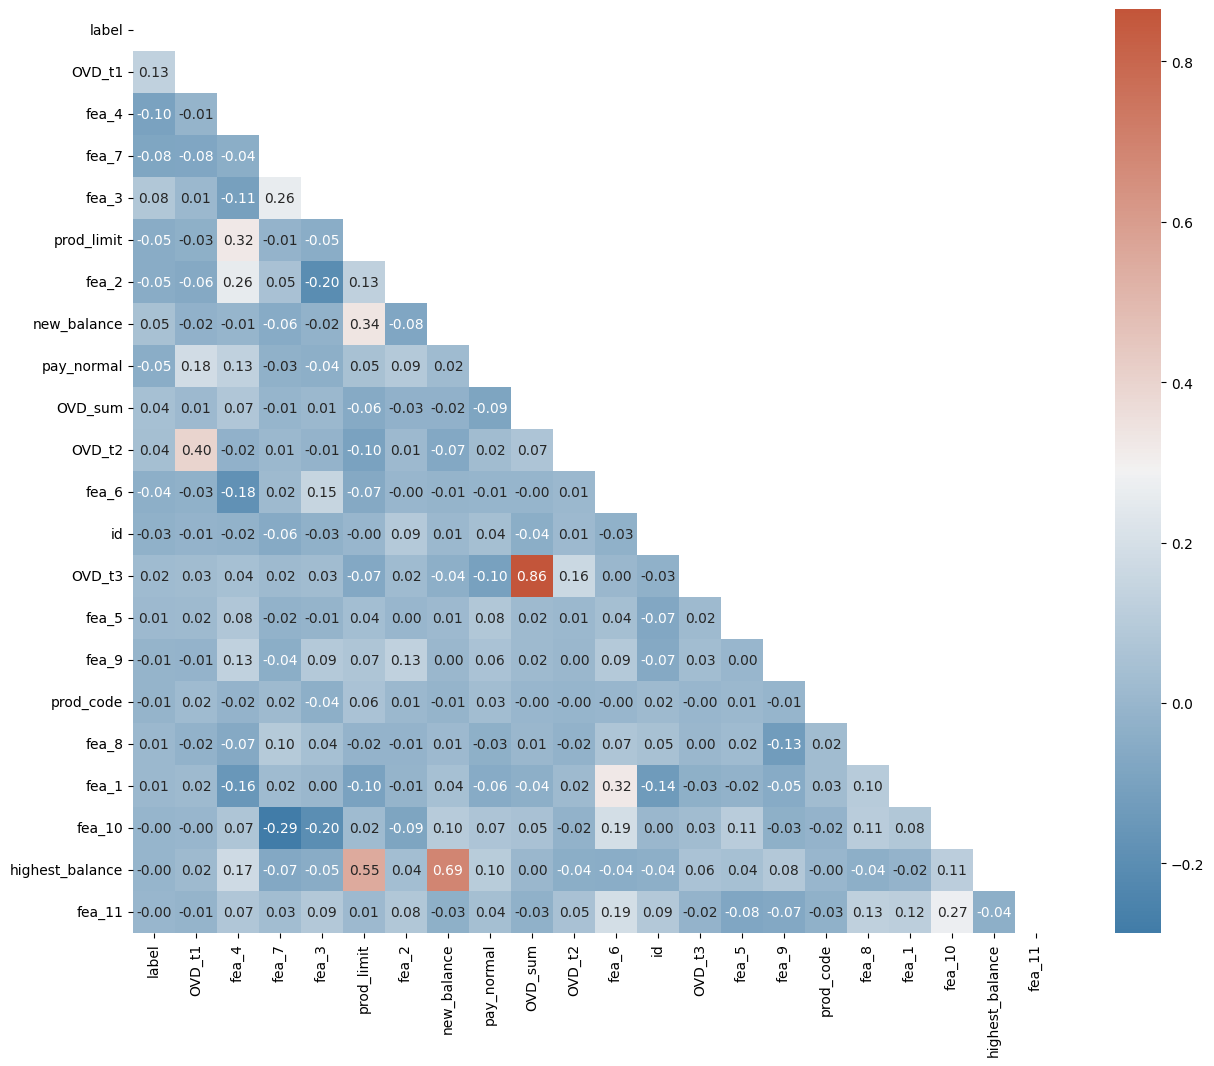

In [26]:
plot_heatmap(df,df.shape[1])

# 3. Split into: train, val, test and train_val

In [11]:
def visualize_split(sets, labels):
    sizes = [len(s) for s in sets]
    colors = [tuple(np.random.rand(3)) for _ in range(len(sets))]
    plt.pie(sizes, labels=labels, colors=colors, autopct='%2.2f%%', startangle=90)
    plt.title('Data Split')
    plt.axis('equal')
    plt.show()


In [12]:
from sklearn.model_selection import train_test_split

def split(df):
    X = df.drop(['label'], axis=1)
    y = df['label']
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
    
    print("X_train", X_train.shape, "y_train", y_train.shape)
    print("X_val",X_val.shape, "y_val", y_val.shape)
    print("X_train_val",X_train_val.shape, "y_train_val", y_train_val.shape)
    print("X_test",X_test.shape, "y_test",y_test.shape)
    
    visualize_split([X_train, X_val, X_test],["X_train","X_val","X_test"])

    return X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val


## Explore set

In [13]:
def plot_risky(X, y):
    risky = (y == 1).sum()
    not_risky = y.shape[0]-risky
    #print(risky, not_risky)
    fig, ax = plt.subplots()
    ax.bar(["Risky", "Not Risky"], [risky, not_risky],color=["red","blue"])
    ax.set_title("Risky vs Not Risky")
    plt.show()


In [14]:
def explore_set(X,y):
    X.info()
    X.describe()
    plot_risky(X, y)


# 4. Fit the model


In [15]:
C_range = [0.001, 0.01, 0.1, 1, 10, 100]


## Logistic Regression: Lasso regularization

In [16]:
def logistic_regression_Lasso(X_train, y_train, X_val, y_val, C_range):
    best_acc = 0
    for C in C_range:
        clf = LogisticRegression(penalty='l1', solver='liblinear', C=C, random_state=42, max_iter=1000)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        print(f"C:{C}, validation accuracy:{acc} \n")
        if acc > best_acc:
            best_acc = acc
            best_C = C
    print("\n")
    return best_C


In [17]:
def logistic_regression_Ridge(X_train, y_train, X_val, y_val, C_range):
    pass

### TO-DO:
    - Remove outliers
    - Feature engineering: with domain knowledge, common transformations
    - Dimensionality reduction (PCA)
    
 

# 5. Evaluate the final model
- Train the final model on the train_validation set using the best C value.
- Evaluate performance on the test set.

In [24]:
def evaluate(X_train_val, y_train_val,X_test, y_test, penalty, best_C):
    # train the final model on the combined train and validation sets using the best C value
    clf = LogisticRegression(penalty=penalty, solver='liblinear', C=best_C, random_state=42)
    clf.fit(X_train_val, y_train_val)
    # evaluate the final model on the test set
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {acc}\n")

    print(classification_report(y_test, y_pred,zero_division=0))
    
    print("How well is the model generalizing to unseen data?")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f')



 

## Evaluate Logistic Regression: Lasso regularization

In [19]:
C_range = [0.001, 0.01, 0.1, 1, 10, 100]

In [20]:
def evalL1(df, C_range):
    df = preprocessLasso(df)
    X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val = split(df)    
    best_C = logistic_regression_Lasso(X_train, y_train, X_val, y_val, C_range)
    print(f"Best C: {best_C}")
    penalty = 'l1'
    evaluate(X_train_val, y_train_val,X_test, y_test, penalty, best_C)

    
    

X_train (1017, 24) y_train (1017,)
X_val (340, 24) y_val (340,)
X_train_val (1357, 24) y_train_val (1357,)
X_test (340, 24) y_test (340,)


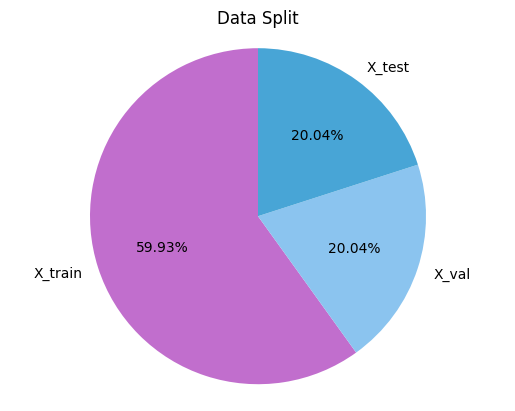

C:0.001, validation accuracy:0.8647058823529412 

C:0.01, validation accuracy:0.8647058823529412 

C:0.1, validation accuracy:0.8647058823529412 

C:1, validation accuracy:0.8647058823529412 

C:10, validation accuracy:0.8647058823529412 

C:100, validation accuracy:0.8647058823529412 



Best C: 0.001
Test accuracy: 0.8794117647058823

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       299
           1       0.00      0.00      0.00        41

    accuracy                           0.88       340
   macro avg       0.44      0.50      0.47       340
weighted avg       0.77      0.88      0.82       340

How well is the model generalizing to unseen data?


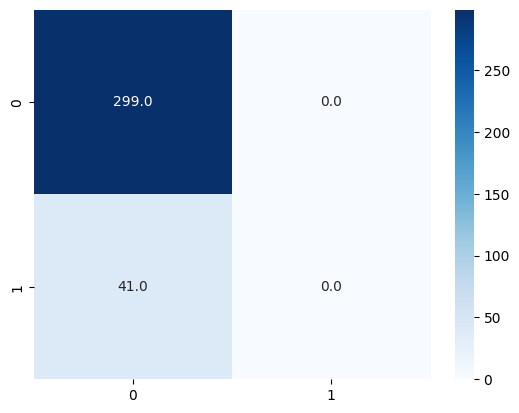

In [25]:
evalL1(df, C_range)
